In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="whitegrid")

file_rlcd = '/export/home/data/viz/rlcdlens.json'
file_stack = '/export/home/data/viz/stacklens.json'
file_wgptlens = '/export/home/data/viz/wgptlens.json'
import json
def read_json(fname):
    with open(fname, 'r') as fd:
        data = json.load(fd)
    return data
import pandas as pd
data_rlcd = pd.read_json(file_rlcd)
data_stack = pd.read_json(file_stack)
data_wgpt = pd.read_json(file_wgptlens)

In [2]:

key_type = 'Type'
key_len = 'Length'
key_data = 'Data'
import statistics
name_sft = 'Sft'
name_org = 'Std'
# convert to data frame
def convert(inp, source_name=''):
    col_type = []
    col_length = []
    col_src = []
    array_sft = []
    array_org = []
    for row in inp.itertuples():
        col_type.append(name_sft)
        col_length.append(row.sftlen)
        array_sft.append(row.sftlen)
        col_type.append(name_org)
        col_length.append(row.origlen)
        array_org.append(row.origlen)
        col_src.append(source_name)
        col_src.append(source_name)
    data = {key_type:col_type, 
            key_len:col_length, 
            key_data:col_src, 
            f"mean_{name_sft}":statistics.mean(array_sft) ,
            f"mean_{name_org}":statistics.mean(array_org)}
    return data
converted_rlcd = convert(data_rlcd,'RLCD')
converted_stack = convert(data_stack,'Stack')
converted_wgpt = convert(data_wgpt, 'WGPT')
merged = {}
merged[key_type] = converted_rlcd[key_type] + converted_stack[key_type] + converted_wgpt[key_type]
merged[key_len] = converted_rlcd[key_len] + converted_stack[key_len] + converted_wgpt[key_len]
merged[key_data] = converted_rlcd[key_data] + converted_stack[key_data] + converted_wgpt[key_data]


In [1]:
key_type = 'Type'
key_len = 'Length'
key_data = 'Data'
import statistics
name_sft = 'Sft'
name_org = 'Std'

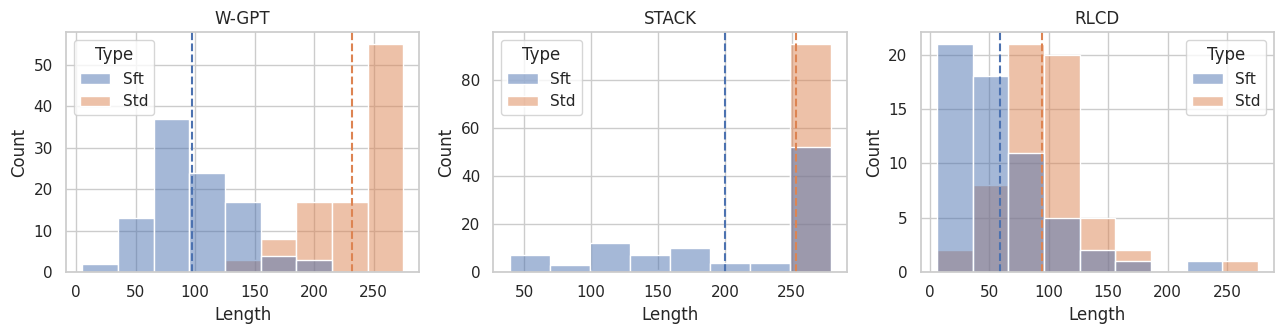

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(13, 3.5), sharey=False)
# fig.suptitle('Initial Pokemon - 1st Generation')
bwidth = 30
sns.color_palette("deep",8)
hexs = sns.color_palette("deep",8).as_hex()
color_1, color2 = hexs[0], hexs[1]
palette ={name_sft: color_1, name_org: color2}


sns.histplot(ax=axes[0], data=converted_wgpt, x=key_len, hue=key_type, binwidth=bwidth, )
axes[0].set_title('W-GPT')
axes[0].axvline(converted_wgpt[f"mean_{name_sft}"], ls='--', color=color_1)
axes[0].axvline(converted_wgpt[f"mean_{name_org}"], ls='--', color=color2)



sns.histplot(ax=axes[1], data=converted_stack, x=key_len, hue=key_type,  binwidth=bwidth, )
axes[1].set_title('STACK')
axes[1].axvline(converted_stack[f"mean_{name_sft}"], ls='--', color=color_1)
axes[1].axvline(converted_stack[f"mean_{name_org}"], ls='--', color=color2)


sns.histplot(data=converted_rlcd, x=key_len, hue=key_type, binwidth=bwidth, ax=axes[2],palette=palette)
axes[2].set_title('RLCD')
axes[2].axvline(converted_rlcd[f"mean_{name_sft}"], ls='--', color=color_1)
axes[2].axvline(converted_rlcd[f"mean_{name_org}"], ls='--', color=color2)


# Plot the distribution of clarity ratings, conditional on carat
# sns.displot(data=merged,x=key_len, hue=key_type, col=key_data,kde=True,height=4,)
fig.tight_layout()
fig.savefig('fig_1_hist_length.pdf')